In [1]:
## Demo from https://github.com/matteoferla/JSME_notebook
!pip install jsme_notebook

  Preparing metadata (setup.py) ... done
  Created wheel for jsme_notebook: filename=jsme_notebook-0.1.4-py3-none-any.whl size=4464 sha256=10350e8f95493c941a8cc82cd00c08b6443d498d1e2fa39eeb44924497e715cd
  Stored in directory: /root/.cache/pip/wheels/87/53/5d/61579bc1b8c4289f4a830b40b0fa6bff3c21fd65a4669f9583
Successfully built jsme_notebook


In [14]:
# Basic usage
from jsme_notebook import JSMENotebook
smiles = 'CCCO' #@param {type:"string"}
jsme = JSMENotebook(smiles)
print('Change the molecule!')
jsme.smiles

Change the molecule!


In [22]:
from jsme_notebook import JSMENotebook
import ipywidgets as widgets
from IPython.display import display

# Initial SMILES string
smiles = 'CCCO'

# Create JSME molecule editor widget
jsme = JSMENotebook(smiles)

# Create a text widget to display and update SMILES
smiles_output = widgets.Text(value=smiles, description="SMILES:")

# Function to update the SMILES output when JSME updates
def update_smiles(change):
    smiles_output.value = jsme.smiles  # Get updated SMILES from JSME

# Button to manually trigger SMILES update
update_button = widgets.Button(description="Update SMILES")

# Bind button click to update function
update_button.on_click(update_smiles)

# Display widgets
display(jsme, update_button, smiles_output)


Button(description='Update SMILES', style=ButtonStyle())

Text(value='CCCO', description='SMILES:')

In [28]:
from jsme_notebook import JSMENotebook
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Load the CSV file (Ensure the file is in the same directory)
file_path = "train_with_fp (1).csv"  # Update with the correct path if needed
df = pd.read_csv(file_path)

# Create JSME molecule editor widget
smiles = 'CCC(=O)N1CCc2cc(CNC(=O)c3ccccc3C)ccc21'
jsme = JSMENotebook(smiles)

# Create a text widget to display and update SMILES
smiles_output = widgets.Text(value=smiles, description="SMILES:")

# Create output area to show "Yes" or "No"
output = widgets.Output()

# Function to update the SMILES output when JSME updates
def update_smiles(change):
    updated_smiles = jsme.smiles  # Get updated SMILES from JSME
    smiles_output.value = updated_smiles  # Display updated SMILES

    # Check if SMILES exists in CSV
    check_smiles(updated_smiles)

# Function to check if a SMILES string exists in the CSV
def check_smiles(smiles):
    with output:
        output.clear_output(wait=True)  # Clear previous output
        if "SMILES" not in df.columns:
            print("Error: No 'SMILES' column found in the CSV file.")
            return

        if smiles in df["SMILES"].values:
            print("Yes")  # SMILES exists in the file
        else:
            print("No")  # SMILES not found

# Button to manually trigger SMILES update and check
update_button = widgets.Button(description="Update SMILES")

# Bind button click to update function
update_button.on_click(update_smiles)

# Display widgets
display(jsme, update_button, smiles_output, output)


Button(description='Update SMILES', style=ButtonStyle())

Text(value='CCC(=O)N1CCc2cc(CNC(=O)c3ccccc3C)ccc21', description='SMILES:')

Output()

In [18]:
jsme.smiles

'CCC(C)C(C)[O+](C)C'

In [4]:
# RDKit variant
!pip install singledispatchmethod rdkit-pypi
from rdkit import Chem

from jsme_notebook.rdkit import JSMERDKit

mol = Chem.MolFromSmiles(smiles)

rd_jsme = JSMERDKit(mol)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 19.4 MB/s eta 0:00:00


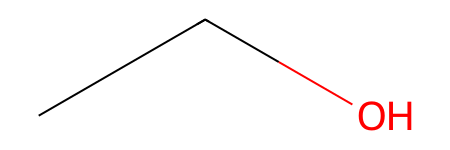

In [5]:
# manual activation of IPython console for rRDKit
from rdkit.Chem.Draw import IPythonConsole
rd_jsme.mol